#  1シード

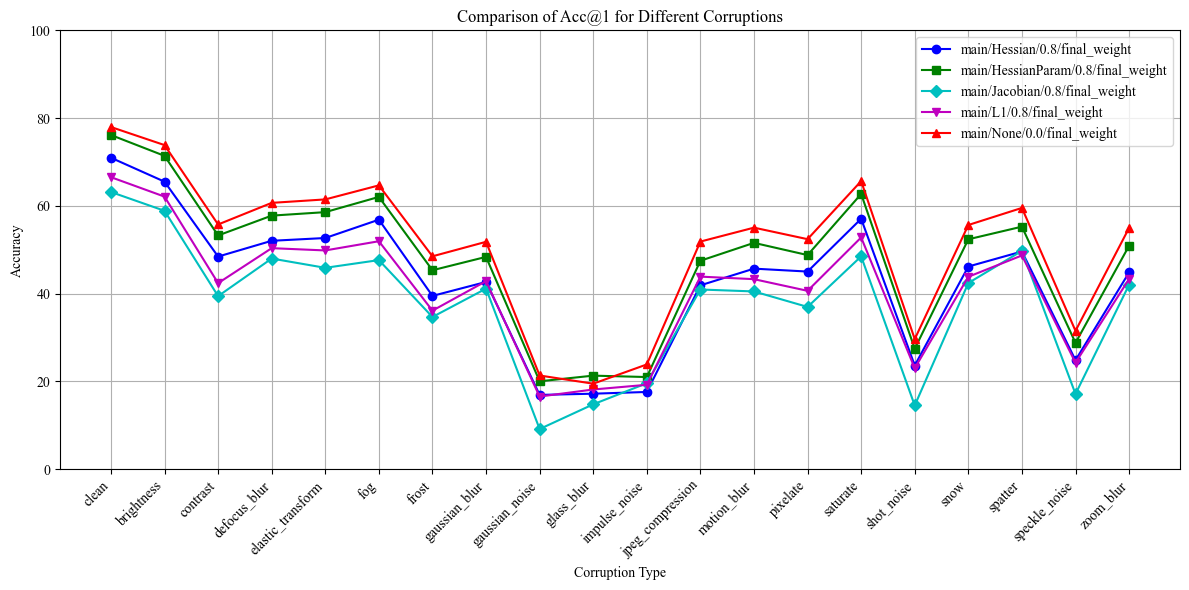

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import glob
font_path = '/home/ueno/fonts/times.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Times New Roman'

Acc1_dict = {'clean': [], 'brightness': [], 'contrast': [], 'defocus_blur': [], 'elastic_transform': [], 'fog': [], 'frost': [], 'gaussian_blur': [], 'gaussian_noise': [], 'glass_blur': [],
             'impulse_noise': [], 'jpeg_compression': [], 'motion_blur': [], 'pixelate': [], 'saturate': [], 'shot_noise': [], 'snow': [], 'spatter': [], 'speckle_noise': [], 'zoom_blur': []}
# paths = ['logs/debug/ResNet18/CIFAR10/L1/0.0001/42/0.5/20250109110709/test/100', 'logs/debug/ResNet18/CIFAR10/Hessian/0.0001/42/0.5/20250109131035/test/100']

# paths = sorted(glob.glob('../logs/main/ResNet18/CIFAR10/*/0.1/42/0.99/*/test/final_weight'))
# paths.append('../logs/main/ResNet18/CIFAR10/None/0.1/42/0.0/20250209091815/test/final_weight')

paths = sorted(glob.glob('../logs/main/ResNet18/CIFAR100/*/0.1/42/0.8/*/test/final_weight'))
paths.append('../logs/main/ResNet18/CIFAR100/None/0.1/42/0.0/20250228021055/test/final_weight')

# pop instance include string 'JacobianParam' from paths
paths = [path for path in paths if 'JacobianParam' not in path]
paths = [path for path in paths if 'Magnitude' not in path]


# print(paths)
for path in paths:
    with open(os.path.join(path, 'total_result.txt')) as f:
        lines = f.readlines()
    for line in lines:
        line = line.split(' ')
        # Add the accuracy to the corresponding list
        Acc1_dict[line[1].strip('*')].append(float(line[line.index('Acc@1') + 1]))

Acc1_dict = {k: v for k, v in Acc1_dict.items() if v}
# print(Acc1_dict)
# print(len(Acc1_dict[list(Acc1_dict.keys())[0]]))

# Plot Accuracy and save figure
# xlabel is Acc1_dict key and ylabel is Acc1_dict value
x_labels = list(Acc1_dict.keys())
markars = ['o', 's', 'D', 'v', '^', '<', '>']
colors = ['b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure(figsize=(12, 6))
for i in range(len(Acc1_dict[list(Acc1_dict.keys())[0]])-1):
    y_values = [Acc1_dict[key][i] for key in x_labels]
    plt.plot(x_labels, y_values, marker=markars[i], label=(paths[i].split('/')[-10]+'/'+paths[i].split('/')[-7]+'/'+paths[i].split('/')[-4]+'/'+paths[i].split('/')[-1]), color=colors[i], linestyle='-')
y_values = [Acc1_dict[key][i+1] for key in x_labels]
plt.plot(x_labels, y_values, marker=markars[i+1], label=(paths[i+1].split('/')[-10]+'/'+paths[i+1].split('/')[-7]+'/'+paths[i+1].split('/')[-4]+'/'+paths[i+1].split('/')[-1]), color='r', linestyle='-')

plt.xlabel('Corruption Type', fontfamily='Times New Roman')
plt.ylabel('Accuracy', fontfamily='Times New Roman')
plt.title('Comparison of Acc@1 for Different Corruptions', fontfamily='Times New Roman')
plt.xticks(rotation=45, ha='right', fontfamily='Times New Roman')
plt.legend(prop={'family': 'Times New Roman'})
plt.ylim(0, 100)
plt.grid()
plt.tight_layout()
# larger font
plt.rcParams.update({'font.size': 16})

plt.savefig('corruption_comparison.png')
plt.show()

In [2]:
print(Acc1_dict)
acc_list = [0.0 for _ in range(Acc1_dict['clean'].__len__())]
for key in Acc1_dict.keys():
    if key == 'clean':
        continue
    for i in range(Acc1_dict[key].__len__()):
        acc_list[i] += Acc1_dict[key][i]
# 平均ほしい
acc_list = [acc / 19 for acc in acc_list]
for i in range(len(Acc1_dict[list(Acc1_dict.keys())[0]])):
    print('/'+paths[i].split('/')[-7]+'/'+paths[i].split('/')[-4]+'/'+paths[i].split('/')[-1], '【CLEAN】', Acc1_dict['clean'][i], '【NOISE】', round(acc_list[i], 2))

{'clean': [70.96, 76.14, 63.15, 66.53, 77.96], 'brightness': [65.504, 71.39, 58.864, 62.096, 73.844], 'contrast': [48.432, 53.246, 39.416, 42.376, 55.748], 'defocus_blur': [52.028, 57.764, 47.984, 50.348, 60.674], 'elastic_transform': [52.664, 58.56, 45.866, 49.83, 61.462], 'fog': [56.838, 62.028, 47.628, 51.928, 64.66], 'frost': [39.466, 45.314, 34.662, 36.108, 48.492], 'gaussian_blur': [42.648, 48.36, 41.126, 42.824, 51.796], 'gaussian_noise': [16.9, 20.004, 9.12, 16.53, 21.324], 'glass_blur': [17.176, 21.292, 14.756, 18.134, 19.46], 'impulse_noise': [17.572, 20.972, 19.562, 19.206, 23.844], 'jpeg_compression': [41.878, 47.48, 40.924, 43.862, 51.85], 'motion_blur': [45.682, 51.558, 40.484, 43.282, 55.024], 'pixelate': [45.014, 48.774, 36.954, 40.624, 52.398], 'saturate': [57.046, 62.698, 48.478, 52.792, 65.636], 'shot_noise': [23.602, 27.422, 14.494, 22.98, 29.622], 'snow': [46.164, 52.372, 42.402, 43.83, 55.63], 'spatter': [49.588, 55.25, 49.732, 48.688, 59.52], 'speckle_noise': [24

# 3シード

In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import glob
font_path = '/home/ueno/fonts/times.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Times New Roman'

mean_dict = {'clean': [], 'brightness': [], 'contrast': [], 'defocus_blur': [], 'elastic_transform': [], 'fog': [], 'frost': [], 'gaussian_blur': [], 'gaussian_noise': [], 'glass_blur': [],
             'impulse_noise': [], 'jpeg_compression': [], 'motion_blur': [], 'pixelate': [], 'saturate': [], 'shot_noise': [], 'snow': [], 'spatter': [], 'speckle_noise': [], 'zoom_blur': []}
std_dict = {'clean': [], 'brightness': [], 'contrast': [], 'defocus_blur': [], 'elastic_transform': [], 'fog': [], 'frost': [], 'gaussian_blur': [], 'gaussian_noise': [], 'glass_blur': [],
             'impulse_noise': [], 'jpeg_compression': [], 'motion_blur': [], 'pixelate': [], 'saturate': [], 'shot_noise': [], 'snow': [], 'spatter': [], 'speckle_noise': [], 'zoom_blur': []}

paths_42 = sorted(glob.glob('../logs/main/ResNet18/CIFAR10/*/0.1/42/0.9/*/test/final_weight'))
paths_111 = sorted(glob.glob('../logs/main/ResNet18/CIFAR10/*/0.1/111/0.9/*/test/final_weight'))
paths_3407 = sorted(glob.glob('../logs/main/ResNet18/CIFAR10/*/0.1/3407/0.9/*/test/final_weight'))
paths_42.append('../logs/main/ResNet18/CIFAR10/None/0.1/42/0.0/20250209091815/test/final_weight')
paths_111.append('../logs/main/ResNet18/CIFAR10/None/0.1/111/0.0/20250324205734/test/final_weight')
paths_3407.append('../logs/main/ResNet18/CIFAR10/None/0.1/3407/0.0/20250324214305/test/final_weight')

paths_42 = [path for path in paths_42 if 'JacobianParam' not in path]
paths_42 = [path for path in paths_42 if 'Magnitude' not in path]
paths_111 = [path for path in paths_111 if 'JacobianParam' not in path]
paths_111 = [path for path in paths_111 if 'Magnitude' not in path]
paths_3407 = [path for path in paths_3407 if 'JacobianParam' not in path]
paths_3407 = [path for path in paths_3407 if 'Magnitude' not in path]

for i in range(len(paths_42)):
    with open(os.path.join(paths_42[i], 'total_result.txt')) as f:
        lines_42 = f.readlines()
    with open(os.path.join(paths_111[i], 'total_result.txt')) as f:
        lines_111 = f.readlines()
    with open(os.path.join(paths_3407[i], 'total_result.txt')) as f:
        lines_3407 = f.readlines()

    for line42, line111, line3407 in zip(lines_42, lines_111, lines_3407):
        line42 = line42.split(' ')
        line111 = line111.split(' ')
        line3407 = line3407.split(' ')
        acc1_values = [
            float(line42[line42.index('Acc@1') + 1]),
            float(line111[line111.index('Acc@1') + 1]),
            float(line3407[line3407.index('Acc@1') + 1])
        ]
        # Add the accuracy to the corresponding list
        mean = round(sum(acc1_values) / len(acc1_values), 2)
        std = round((sum((x - mean) ** 2 for x in acc1_values) / len(acc1_values)) ** 0.5, 2)
        mean_dict[line42[1].strip('*')].append(mean)
        std_dict[line42[1].strip('*')].append(std)

mean_dict = {k: v for k, v in mean_dict.items() if v}
std_dict = {k: v for k, v in std_dict.items() if v}
print(mean_dict)
print(std_dict)

IndexError: list index out of range

In [7]:
mean_list = [0.0 for _ in range(mean_dict['clean'].__len__())]
for key in mean_dict.keys():
    if key == 'clean':
        continue
    for i in range(mean_dict[key].__len__()):
        mean_list[i] += mean_dict[key][i]
std_list = [0.0 for _ in range(std_dict['clean'].__len__())]
for key in std_dict.keys():
    if key == 'clean':
        continue
    for i in range(std_dict[key].__len__()):
        std_list[i] += std_dict[key][i]
# 平均ほしい
mean_list = [acc / 19 for acc in mean_list]
std_list = [acc / 19 for acc in std_list]
for i in range(len(mean_dict[list(mean_dict.keys())[0]])):
    print('/'+paths[i].split('/')[-7]+'/'+paths[i].split('/')[-4]+'/'+paths[i].split('/')[-1], '【CLEAN】', mean_dict['clean'][i], '±', std_dict['clean'][i], '【NOISE】', round(acc_list[i], 2), '±', round(std_list[i], 2))

/Hessian/0.8/final_weight 【CLEAN】 79.19 ± 9.62 【NOISE】 41.46 ± 7.35
/HessianParam/0.8/final_weight 【CLEAN】 90.78 ± 0.21 【NOISE】 46.53 ± 0.95
/Jacobian/0.8/final_weight 【CLEAN】 39.26 ± 28.36 【NOISE】 36.4 ± 17.33
/L1/0.8/final_weight 【CLEAN】 34.83 ± 5.8 【NOISE】 39.63 ± 4.18
/None/0.0/final_weight 【CLEAN】 95.29 ± 0.12 【NOISE】 49.34 ± 0.8


In [5]:
import gzip, pickle
def load_compressed(filename):
    with gzip.open(filename, 'rb') as f:
        return pickle.load(f)
data = load_compressed('/home/ueno/pruning/test/logs/debug/ResNet18/CIFAR10/HessianParam/0.1/42/0.9/20250308165749/prune_info/score_0.gz')

In [6]:
data[-1]

tensor([2.4802e-14, 2.7256e-14, 4.5526e-13,  ..., 2.6600e-21, 5.6735e-13,
        5.8266e-14], device='cuda:0', requires_grad=True)